In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import lightgbm as lgb
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [7]:
train_df = pd.read_csv("train_Wc8LBpr.csv")
test_df = pd.read_csv("test_VsU9xXK.csv")

In [8]:
train_df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [9]:
test_df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [10]:
print("train dataset is of shape: ", train_df.shape)
print("test dataset is of shape: ", test_df.shape)

train dataset is of shape:  (131662, 14)
test dataset is of shape:  (87395, 13)


In [11]:
train_df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [12]:
test_df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

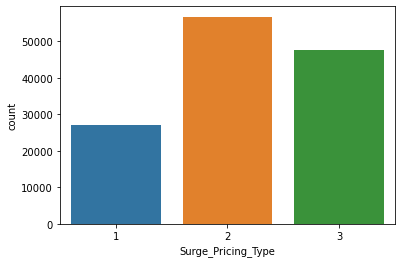

In [13]:
sns.countplot(train_df["Surge_Pricing_Type"])

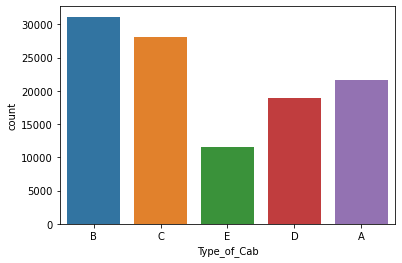

In [14]:
sns.countplot(train_df["Type_of_Cab"])

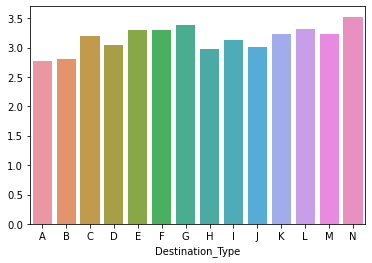

In [15]:
x = train_df.groupby("Destination_Type")["Customer_Rating"].mean().index
y=train_df.groupby("Destination_Type")["Customer_Rating"].mean().values
sns.barplot(x,y)

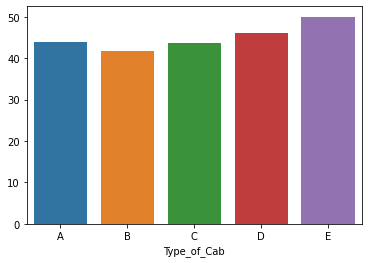

In [16]:
x = train_df.groupby("Type_of_Cab")["Trip_Distance"].mean().index
y=train_df.groupby("Type_of_Cab")["Trip_Distance"].mean().values
sns.barplot(x,y)

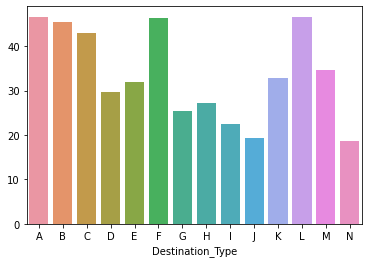

In [17]:
x = train_df.groupby("Destination_Type")["Trip_Distance"].mean().index
y=train_df.groupby("Destination_Type")["Trip_Distance"].mean().values
sns.barplot(x,y)

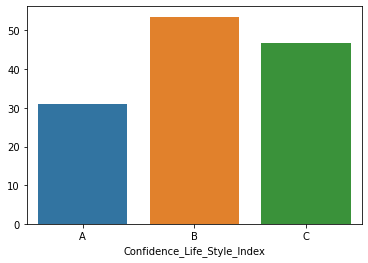

In [18]:
x = train_df.groupby("Confidence_Life_Style_Index")["Trip_Distance"].mean().index
y=train_df.groupby("Confidence_Life_Style_Index")["Trip_Distance"].mean().values
sns.barplot(x,y)

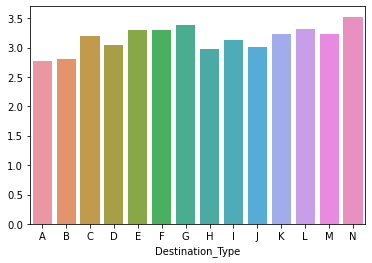

In [19]:
x = train_df.groupby("Destination_Type")["Customer_Rating"].mean().index
y=train_df.groupby("Destination_Type")["Customer_Rating"].mean().values
sns.barplot(x,y)

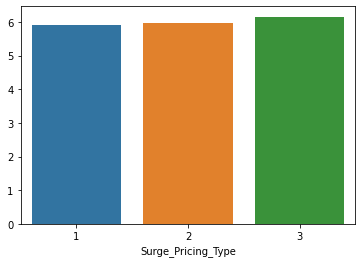

In [20]:
x = train_df.groupby("Surge_Pricing_Type")["Customer_Since_Months"].mean().index
y=train_df.groupby("Surge_Pricing_Type")["Customer_Since_Months"].mean().values
sns.barplot(x,y)

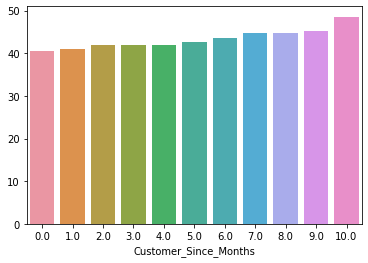

In [21]:
x = train_df.groupby("Customer_Since_Months")["Trip_Distance"].mean().index
y=train_df.groupby("Customer_Since_Months")["Trip_Distance"].mean().values
sns.barplot(x,y)

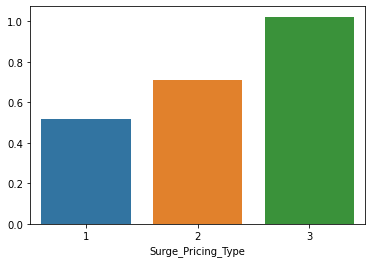

In [22]:
x = train_df.groupby("Surge_Pricing_Type")["Cancellation_Last_1Month"].mean().index
y=train_df.groupby("Surge_Pricing_Type")["Cancellation_Last_1Month"].mean().values
sns.barplot(x,y)

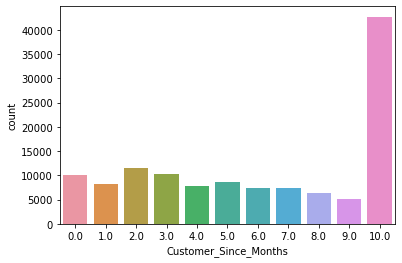

In [23]:
sns.countplot(train_df["Customer_Since_Months"])

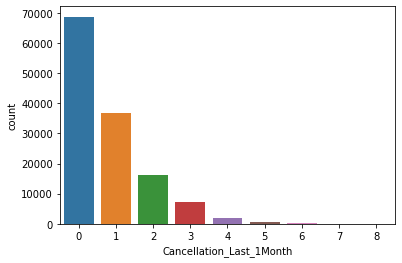

In [24]:
sns.countplot(train_df["Cancellation_Last_1Month"])

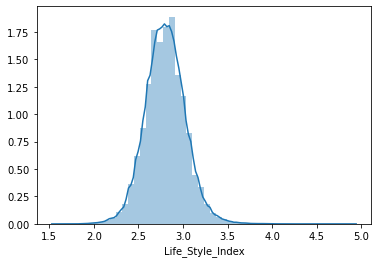

In [25]:
sns.distplot(train_df["Life_Style_Index"])
plt.show()

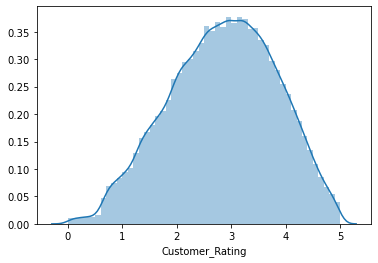

In [26]:
sns.distplot(train_df["Customer_Rating"])
plt.show()

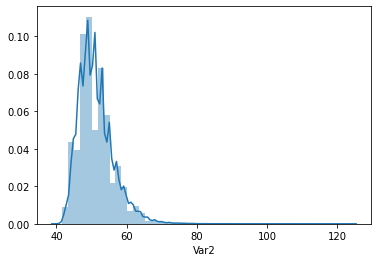

In [27]:
sns.distplot(train_df["Var2"])
plt.show()

## Feature engineering

In [28]:
train_df["Trip_Distance_per_destType"] = train_df["Trip_Distance"]/train_df.groupby(['Destination_Type'])['Trip_Distance'].transform('mean')
train_df["Trip_Distance_per_CabType"] = train_df["Trip_Distance"]/train_df.groupby(['Type_of_Cab'])['Trip_Distance'].transform('mean')
train_df["Trip_Distance_per_lifeStyle"] = train_df["Trip_Distance"]/train_df.groupby(['Confidence_Life_Style_Index'])['Trip_Distance'].transform('mean')


test_df["Trip_Distance_per_destType"] = test_df["Trip_Distance"]/test_df.groupby(['Destination_Type'])['Trip_Distance'].transform('mean')
test_df["Trip_Distance_per_CabType"] = test_df["Trip_Distance"]/test_df.groupby(['Type_of_Cab'])['Trip_Distance'].transform('mean')
test_df["Trip_Distance_per_lifeStyle"] = test_df["Trip_Distance"]/test_df.groupby(['Confidence_Life_Style_Index'])['Trip_Distance'].transform('mean')




In [29]:
all_data = pd.concat([train_df, test_df])

In [30]:
cat_cols = ["Type_of_Cab", "Confidence_Life_Style_Index", "Destination_Type", "Gender"]
all_data= pd.get_dummies(all_data, columns=cat_cols)

In [31]:
all_data.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Trip_Distance_per_destType,Trip_Distance_per_CabType,Trip_Distance_per_lifeStyle,Type_of_Cab_A,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_A,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2.0,0.145168,0.162634,0.219152,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2.0,0.631918,0.707949,0.550570,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,41.58,10.0,NaN,3.50125,2,NaN,56,77,2.0,1.299231,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,T0005689465,61.56,10.0,NaN,3.45375,0,NaN,52,74,3.0,1.320017,1.410791,NaN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2.0,1.178280,1.259308,1.026598,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
train_len = train_df.shape[0]
test_len = test_df.shape[0]

train_df = all_data[:train_len]
test_df = all_data[train_len:]

In [33]:
target_map = {1:0, 2:1, 3:2}
target_map_inverse = {0:1, 1:2, 2:3}

In [34]:
train_df["Surge_Pricing_Type"] = train_df["Surge_Pricing_Type"].map(target_map)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
features = [col for col in train_df.columns if col not in ["Trip_ID", "Surge_Pricing_Type"]]
target = train_df["Surge_Pricing_Type"]

In [38]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.5,
    'boost': 'gbdt',
    'feature_fraction': 0.7,
    'learning_rate': 0.005,
    'num_class':3,
    'metric':'multi_logloss',
    'max_depth': 8,  
    'num_leaves': 70,
    'min_data_in_leaf':40,
    'objective': 'multiclass',
    'scale_pos_weight':1,
    'device':'gpu',
    'verbosity': 1
}

## 5 fold cross val

In [39]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1048)
predictions = np.zeros((len(test_df), 3))
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    predictions_val = np.argmax(clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration), axis=1)
    
    print("CV score: {:<8.5f}".format(sklearn.metrics.accuracy_score(predictions_val, target.iloc[val_idx])))
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits



Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.677927	valid_1's multi_logloss: 0.69856
[2000]	training's multi_logloss: 0.645835	valid_1's multi_logloss: 0.689301
[3000]	training's multi_logloss: 0.623739	valid_1's multi_logloss: 0.688352
Early stopping, best iteration is:
[2890]	training's multi_logloss: 0.625996	valid_1's multi_logloss: 0.688302
CV score: 0.70641 
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.676347	valid_1's multi_logloss: 0.70422
[2000]	training's multi_logloss: 0.643938	valid_1's multi_logloss: 0.695082
[3000]	training's multi_logloss: 0.62184	valid_1's multi_logloss: 0.694166
Early stopping, best iteration is:
[2860]	training's multi_logloss: 0.62468	valid_1's multi_logloss: 0.694135
CV score: 0.70258 
Fold 2
Training until validation scores don't improve for 1000 rounds
[1000]	training's multi_logloss: 0.677491	valid_1's multi_logloss: 0.70093
[20

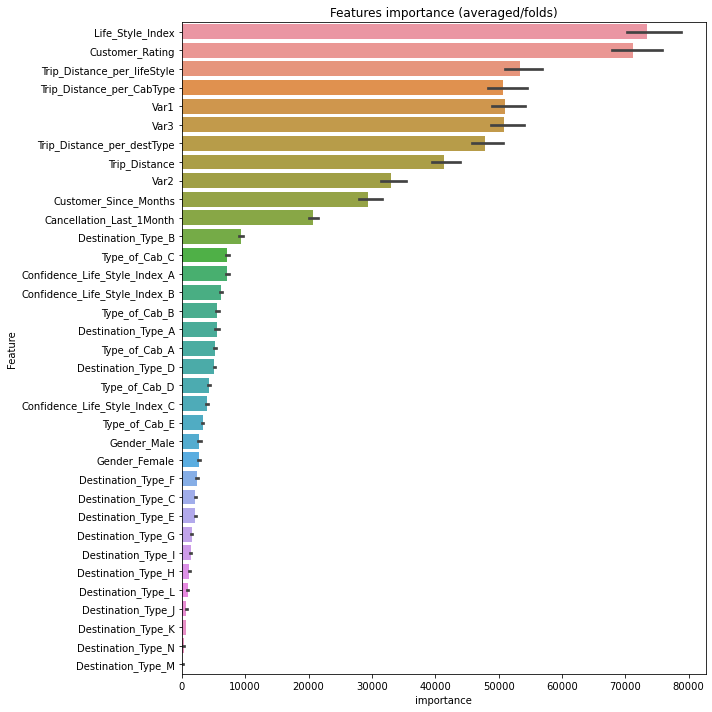

In [40]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [43]:
submission = pd.read_csv("sample_submission_NoPBkjr.csv")
submission.head()

,Trip_ID,Surge_Pricing_Type
0,T0005689459,2
1,T0005689462,2
2,T0005689463,2
3,T0005689466,2
4,T0005689468,2


In [45]:
predictions_test = np.argmax(predictions, axis=1)

In [46]:
submission["Surge_Pricing_Type"] = predictions_test
submission["Surge_Pricing_Type"] = submission["Surge_Pricing_Type"].map(target_map_inverse)

In [47]:
submission.to_csv("janatahack_mobility.csv", index=False)

In [ ]:
create_download_link(filename="janatahack_mobility5.csv")